In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#I-A
def matrix_multiplication (m_1: np.ndarray, m_2: np.ndarray) : 
    return np.multiply(m_1, m_2)

l_timings = []

for i in range(11):
    dim = 10+i
    m = np.random.uniform(0., 1., (dim, dim))
    timings = %timeit -o -n 10 -r 5 -q matrix_multiplication(m, m)
    l_timings.append([dim, timings.best])

t = np.array (l_timings)
print (t)

[[1.00000000e+01 1.10700000e-06]
 [1.10000000e+01 1.05400000e-06]
 [1.20000000e+01 1.32960000e-06]
 [1.30000000e+01 7.06899999e-07]
 [1.40000000e+01 7.16599999e-07]
 [1.50000000e+01 7.23799999e-07]
 [1.60000000e+01 7.35200001e-07]
 [1.70000000e+01 7.53800001e-07]
 [1.80000000e+01 7.52599999e-07]
 [1.90000000e+01 7.53800001e-07]
 [2.00000000e+01 7.55599999e-07]]


In [ ]:
#I-B
def rec_bb (t, f, l, key) : 
    
    if f>l : 
        return None
    
    mid = (f+l) // 2
    
    if key==t[mid] : 
        return mid
    elif key<t[mid] : 
        return rec_bb (t, f, mid-1, key)
    else : 
        return rec_bb (t, mid+1, l, key)

#mido el tiempo de ejecucion de la funcion recursiva (rec_bb)
l_times = []
for i, size in enumerate(range(5, 15)):
    t = list(range(2**i * size))
    key = -1
    timings = %timeit -n 100 -r 10 -o -q rec_bb(t, 0, len(t) - 1, key)
    l_times.append([len(t), timings.best])
times = np.array(l_times)
print ("Tiempo de la funcion recursiva\n")
print(times)

def bb(t: list, f: int, l: int, key: int) -> int:
    while f < l:

        mid = (f + l) // 2

        if t[mid] == key:
            return mid
        elif t[mid] < key:
            f = mid + 1
        else:
            l = mid - 1
#mido el tiempo de ejecucion de la funcion iterativa (bb)       
l_times = []
for i, size in enumerate(range(5, 15)):
    t = list(range(2**i * size))
    key = -1
    timings = %timeit -n 100 -r 10 -o -q bb(t, 0, len(t) - 1, key)
    l_times.append([len(t), timings.best])
time = np.array(l_times)
print ("\nTiempo de la funcion recursiva\n")
print(time)

Tiempo de la funcion recursiva

[[5.00000e+00 8.26090e-07]
 [1.20000e+01 1.12431e-06]
 [2.80000e+01 1.40007e-06]
 [6.40000e+01 1.96814e-06]
 [1.44000e+02 2.25187e-06]
 [3.20000e+02 2.65394e-06]
 [7.04000e+02 2.93084e-06]
 [1.53600e+03 3.28946e-06]
 [3.32800e+03 3.60267e-06]
 [7.16800e+03 3.91280e-06]]

Tiempo de la funcion recursiva

[[5.00000e+00 6.72880e-07]
 [1.20000e+01 8.92890e-07]
 [2.80000e+01 1.10698e-06]
 [6.40000e+01 1.30519e-06]
 [1.44000e+02 1.53110e-06]
 [3.20000e+02 1.79131e-06]
 [7.04000e+02 2.08464e-06]
 [1.53600e+03 2.57491e-06]
 [3.32800e+03 2.87003e-06]
 [7.16800e+03 3.11722e-06]]


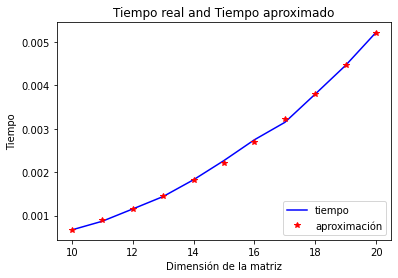

In [55]:
#I-C
from sklearn.linear_model import LinearRegression
from typing import List, Callable

def matrix_multiplication(m_1: np.ndarray, m_2: np.ndarray) -> np.ndarray:
    n_rows, n_interm, n_columns = m_1.shape[0], m_2.shape[0], m_2.shape[1]
    m_product = np.zeros((n_rows, n_columns))
    for p in range(n_rows):
        for q in range(n_columns):
            for r in range(n_interm):
                m_product[p, q] += m_1[p, r] * m_2[r, q]
    return m_product

l_timings = []
for i in range(11):
    dim = 10+i
    m = np.random.uniform(0., 1., (dim, dim))
    timings = %timeit -o -n 10 -r 5 -q matrix_multiplication(m, m)
    l_timings.append([dim, timings.best])

def fit_func_2_times(timings: np.ndarray, func_2_fit: Callable):
    if len(timings.shape) == 1:
        timings = timings.reshape(-1, 1)
    values = func_2_fit(timings[ :, 0]).reshape(-1, 1)
    times = timings[ : , 1] 
    lr_m = LinearRegression()
    lr_m.fit(values, times)
    return lr_m.predict(values)
def func_2_fit(n):
    return n**3

times = np.array(l_timings)


t2 = fit_func_2_times(times, func_2_fit)

#Creo la figura y los ejes 
#imprimo el tiempo de la funcion recursiva (time)
plt.plot(times[:, 0], times[: , 1], 'b', label="tiempo")
plt.plot(times[:, 0], t2[:], '*r', label="aproximación")
plt.title("%s and %s" % ('Tiempo real', 'Tiempo aproximado'))
plt.xlabel ("Dimensión de la matriz")
plt.ylabel ("Tiempo")
plt.legend (loc="lower right")
plt.show()

In [ ]:
#I-C

l_timing = []
for i in range(11):
    dim = 10+i
    m = np.random.uniform(0., 1., (dim, dim))
    timings = %timeit -o -n 10 -r 5 -q matrix_multiplication(m, m)
    l_timing.append([dim, timings.best])
s = np.array(l_timing)
print (f"Time spent without using .dot: \n\n{s}")


timess = []
for i in range(11):
    dim = 10+i
    m = np.random.uniform(0., 1., (dim, dim))
    timings = %timeit -o -n 10 -r 5 -q matrix_multiplication(m, m)
    timess.append([dim, timings.best])
t = np.array(timess)
print (f"\nTime spent using .dot: \n\n{t}")

Time spent without using .dot: 

[[1.00000000e+01 6.56100002e-07]
 [1.10000000e+01 6.65099998e-07]
 [1.20000000e+01 7.79599998e-07]
 [1.30000000e+01 7.20899999e-07]
 [1.40000000e+01 7.22300001e-07]
 [1.50000000e+01 7.09099999e-07]
 [1.60000000e+01 7.27099996e-07]
 [1.70000000e+01 7.27200000e-07]
 [1.80000000e+01 7.28700002e-07]
 [1.90000000e+01 7.66400001e-07]
 [2.00000000e+01 7.74599999e-07]]

Time spent using .dot: 

[[1.00000000e+01 6.71900000e-07]
 [1.10000000e+01 7.19200000e-07]
 [1.20000000e+01 7.03000001e-07]
 [1.30000000e+01 7.34800000e-07]
 [1.40000000e+01 6.97500002e-07]
 [1.50000000e+01 7.29300001e-07]
 [1.60000000e+01 7.29900000e-07]
 [1.70000000e+01 7.47199999e-07]
 [1.80000000e+01 7.67099999e-07]
 [1.90000000e+01 7.57499998e-07]
 [2.00000000e+01 7.91100001e-07]]


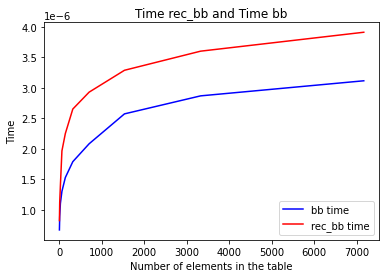

In [ ]:
#I-C
plt.plot(time[:, 0], time[: , 1], 'b', label="bb time")
plt.plot(times[:, 0], times[: , 1], 'r', label="rec_bb time")
plt.title("%s and %s" % ('Time rec_bb', 'Time bb'))
plt.xlabel ("Number of elements in the table")
plt.ylabel ("Time")
plt.legend (loc="lower right")
plt.show()

In [3]:
#II-A
def min_heapify(h: np.ndarray, i: int):
    
    while 2*i+1 < len(h):
        n_i = i
        if h[int(n_i)] > h[int(2*i+1)]:
            n_i = 2*i+1
        if 2*i+2 < len(h) and h[int(n_i)] > h[int(2*i+2)]:
            n_i = 2*i+2
        if n_i > i:
            h[int(i)], h[int(n_i)] = h[int(n_i)], h[int(i)]
            i = n_i
        else:
            return
#Prueba
array = [9,3,2,1,4,5]
min_heapify (array, 0)
print (array)

[2, 3, 5, 1, 4, 9]


In [4]:
def insert_min_heap(h: np.ndarray, k: int) -> np.ndarray : 

    if h == None: 
        h == []
    
    h += [k]
    j = len(h) - 1
    
    #parent = (j-1)/2
    while j>=1 and h[(j-1)//2] > h[j]:
        h[(j-1)//2], h[j] = h[j], h[(j-1)//2]
        j = (j-1)//2
    
    return h
#Prueba para insert_min_heap 
array = [1, 2, 6, 7, 8, 9]
insert_min_heap (array, 5)
print (array)

[1, 2, 5, 7, 8, 9, 6]


In [5]:
def create_min_heap (h:np.ndarray): 
    
    if (len(h)==0): 
        return
    
    i = ((len(h)-1)-1)/2
    
    while i > -1: 
        min_heapify (h, i)
        i = i - 1
#Prueba 
h = [9,3,2,1,4,5]
create_min_heap(h)
print(h)

[1, 3, 2, 9, 4, 5]


In [6]:
#II-B
def pq_ini() : 
    pq = []
    return pq 
  
def pq_insert (h: np.ndarray, k:int)-> np.ndarray :  
    
    if h==None : 
        return None
    
    return insert_min_heap (h, k)
#prueba para el pq_insert 
h = pq_ini()
h = [1, 2, 6, 7, 8, 9]
j = pq_insert(h, 5)
print (j)

[1, 2, 5, 7, 8, 9, 6]


In [48]:
def pq_remove(h: np.ndarray) : 
    if len(h)==0 : 
        return (h[0], h)
    
    k = h[0]
    h[0] = h[-1]
    min_heapify (h, 0)
    
    return (k, h)
#Prueba
h = [1, 2, 6, 7, 8, 9]
j = pq_remove(h)
print(j)

(1, [2, 7, 6, 9, 8, 9])


In [54]:
#II-C
def select_min_heap(h: np.ndarray, k: int)-> int: 
    h_aux = []
    
    for i in range (0, k) : 
      insert_min_heap (h_aux, -h[i])

    for i in range (0, len(h)) : 
      if -h[i] > h_aux[0] : 
        h_aux = pq_remove (h_aux)[1]
        h_aux = insert_min_heap(h_aux, -h[i])
    
    return -h_aux[0]
#Prueba
array = [4, 6, 1, 2, 9, 3, 10, 5, 8, 7]
k=2
print(select_min_heap(array, k))

4


In [ ]:
#II-D cuestion 1
l_times = []
for i, size in enumerate(range(5, 15)):
    t = list(range(2**i * size))
    key = -1
    timings = %timeit -n 100 -r 10 -o -q bb(t, 0, len(t) - 1, key)
    l_times.append([len(t), timings.best])
time = np.array(l_times)
print ("\nTiempo de la funcion recursiva\n")
print(time)

plt.plot(time[:, 0], time[: , 1], 'b', label="bb time")
plt.plot(times[:, 0], times[: , 1], 'r', label="rec_bb time")
plt.title("%s and %s" % ('Time rec_bb', 'Time bb'))
plt.xlabel ("Number of elements in the table")
plt.ylabel ("Time")
plt.legend (loc="lower right")
plt.show()



In [ ]:
#II-D cuestion 2

In [ ]:
#II-D cuestion 3 


In [ ]:
#II-D cuestion 4